<a href="https://colab.research.google.com/github/Yusufismail/Ismail-s-CV/blob/main/radio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle as pkl
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle as pkl
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape, Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gdown
!pip install tensorflow

import gdown
import pickle as pkl
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense

# Google Drive file ID and destination path
file_id = '1UAS3HX-LfFWxBvtDIbnuKyW702NuARZL'
destination = 'RML2016.10a_dict.pkl'

# Construct the URL for gdown
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file using gdown
gdown.download(url, destination, quiet=False)

# Define a function to load data from a pickle file
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pkl.load(f, encoding='latin1')
    return data

# Load the data from the downloaded file
file_path = 'RML2016.10a_dict.pkl'
xd = load_data(file_path)

# Exploring the data
print(type(xd))  # Check the type of the loaded data
print(xd.keys())  # If it's a dictionary, print the keys
print(xd[list(xd.keys())[0]][:5])  # Print the first 5 elements of the first key's data

# Process the data
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], xd.keys())))), [1, 0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(xd[(mod, snr)])
        for i in range(xd[(mod, snr)].shape[0]):
            lbl.append((mod, snr))
X = np.vstack(X)

# Transpose data to match expected input shape
X = np.transpose(X, (0, 2, 1))

# Split the data into training and testing sets
np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.5)
train_idx = np.random.choice(range(0, n_examples), size=n_train, replace=False)
test_idx = list(set(range(0, n_examples)) - set(train_idx))
X_train = X[train_idx]
X_test = X[test_idx]

def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy) + 1])
    yy1[np.arange(len(yy)), yy] = 1
    return yy1

Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)
classes = mods

# Define the model
model = Sequential()
model.add(Conv1D(256, 1, input_shape=in_shp, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(256, 3, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(80, 3, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(80, 3, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Set batch size and number of epochs (uncomment and adjust if needed)
# batch_size = 1024  # Adjust batch size if needed
# nb_epoch = 10  # Adjust number of epochs if needed

Downloading...
From (original): https://drive.google.com/uc?id=1UAS3HX-LfFWxBvtDIbnuKyW702NuARZL
From (redirected): https://drive.google.com/uc?id=1UAS3HX-LfFWxBvtDIbnuKyW702NuARZL&confirm=t&uuid=2d3bf805-ea24-47ba-8a73-a4df450c79a3
To: /content/RML2016.10a_dict.pkl
100%|██████████| 641M/641M [00:20<00:00, 31.0MB/s]


<class 'dict'>
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('8PSK', 8), ('8PSK', 12), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('PAM4', -6), ('WBFM', -18), ('AM-DSB', 16), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('BPSK', -10), ('QPSK', 8), ('PAM4', 14), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('WBFM', -4), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('8PSK', -8), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('GFSK', 18), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), ('AM-DSB

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 128, 256)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 128, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 128, 80)             │          61,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 128, 80)             │          19,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10240)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,621,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,902,955 (11.07 MB)

 Trainable params: 2,902,955 (11.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 1024  # Adjust batch size if needed
epochs = 60  # Adjust number of epochs if needed

# Train the model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

# Print final training results
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")

Epoch 1/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.1285 - loss: 2.3198 - val_accuracy: 0.2507 - val_loss: 2.0290
Epoch 2/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.2752 - loss: 1.9445 - val_accuracy: 0.3344 - val_loss: 1.7927
Epoch 3/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.3356 - loss: 1.7801 - val_accuracy: 0.3623 - val_loss: 1.7193
Epoch 4/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.3427 - loss: 1.7756 - val_accuracy: 0.3060 - val_loss: 1.8902
Epoch 5/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.3293 - loss: 1.8147 - val_accuracy: 0.3700 - val_loss: 1.7053
Epoch 6/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.3708 - loss: 1.6919 - val_accuracy: 0.3895 - val_loss: 1.6466
Epoch 7/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.3901 - loss: 1.6377 - val_accuracy: 0.3989 - val_loss: 1.6132
Epoch 8/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.3993 - loss: 1

In [ ]:
score =model.evaluate(X_test, Y_test,  verbose=0, batch_size=1024)
print('Total overall score => Loss: {:.4f}   Over-All Accuracy: {:.0f}%'.format(score[0],100*score[1]))

Total overall score => Loss: 1.3154   Over-All Accuracy: 53%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

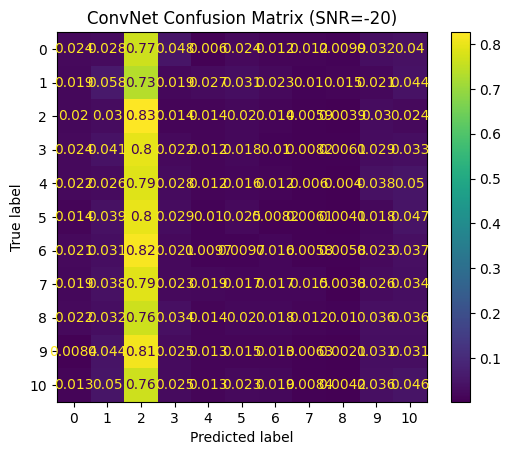

SNR: -20 - Accuracy: 10%   no. of test Signals: 5465 
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

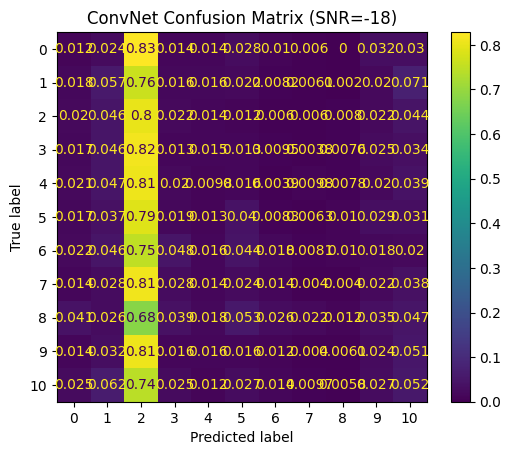

SNR: -18 - Accuracy: 9%   no. of test Signals: 5505 
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

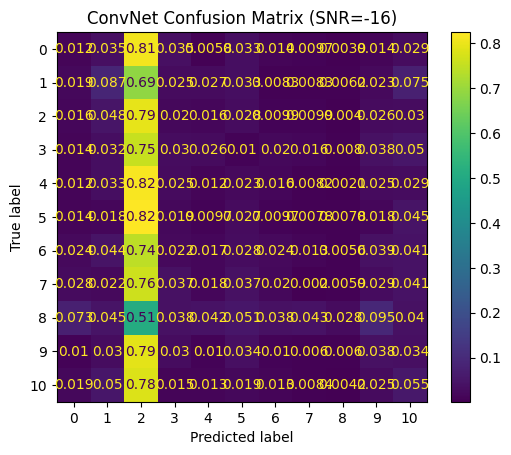

SNR: -16 - Accuracy: 10%   no. of test Signals: 5528 
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

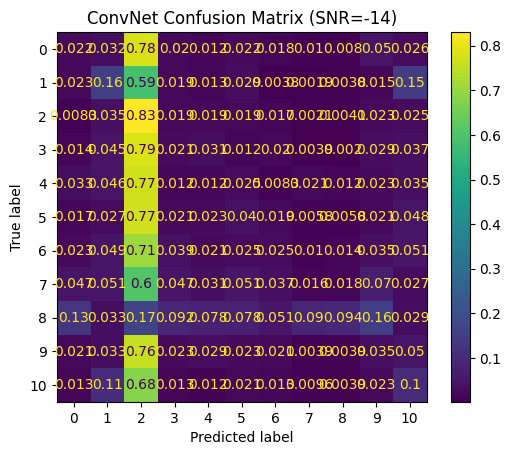

SNR: -14 - Accuracy: 12%   no. of test Signals: 5542 
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

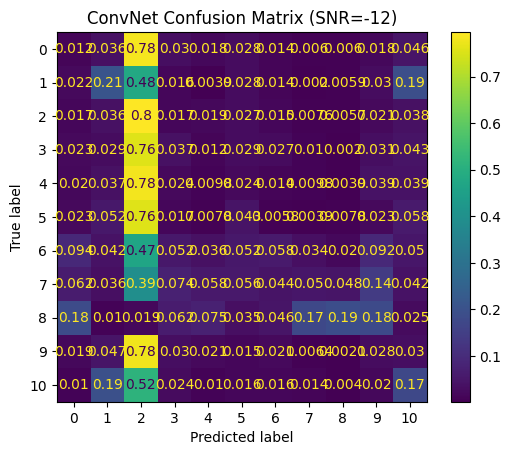

SNR: -12 - Accuracy: 15%   no. of test Signals: 5485 
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Figure size 640x480 with 0 Axes>

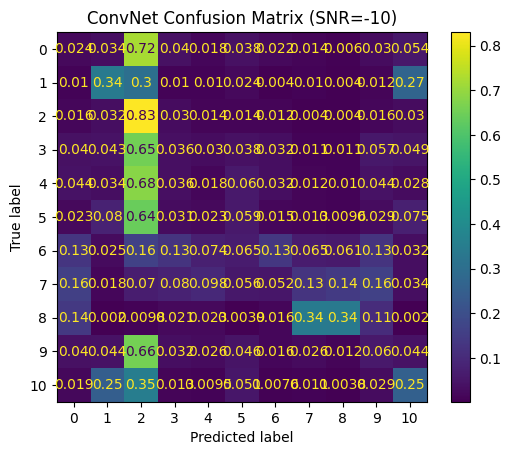

SNR: -10 - Accuracy: 20%   no. of test Signals: 5627 
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

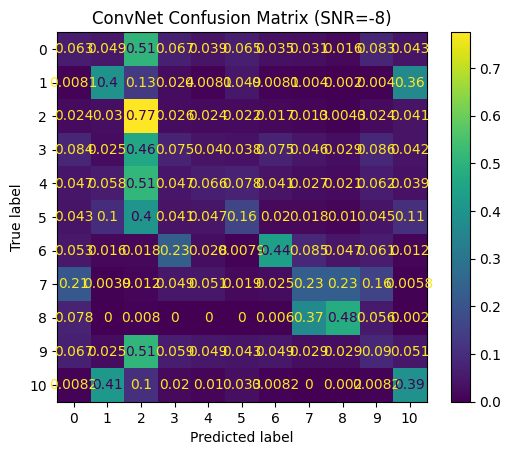

SNR: -8 - Accuracy: 28%   no. of test Signals: 5443 
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

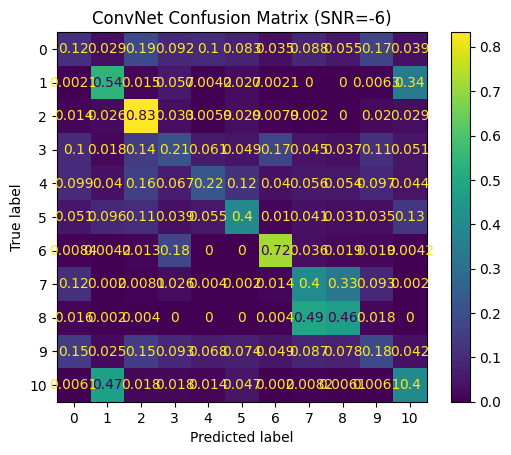

SNR: -6 - Accuracy: 41%   no. of test Signals: 5456 
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

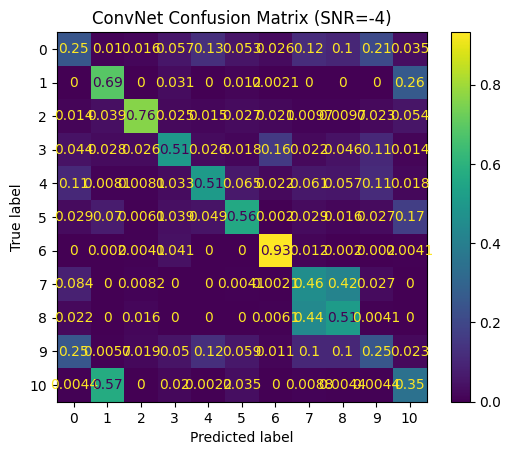

SNR: -4 - Accuracy: 53%   no. of test Signals: 5410 
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

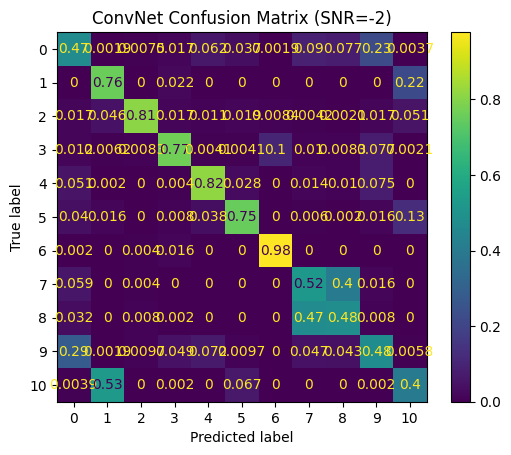

SNR: -2 - Accuracy: 65%   no. of test Signals: 5512 
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

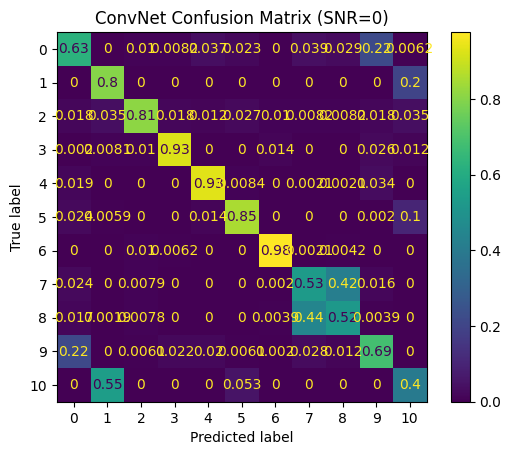

SNR: 0 - Accuracy: 73%   no. of test Signals: 5480 
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

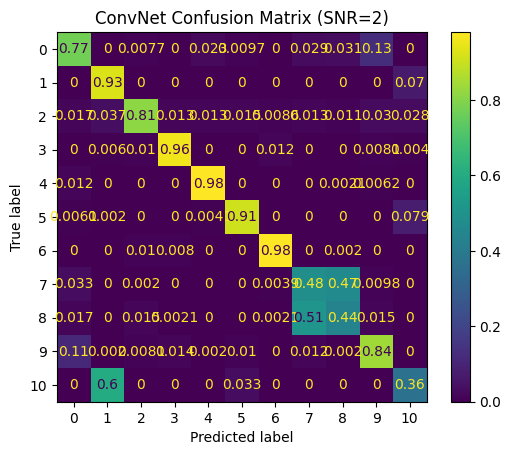

SNR: 2 - Accuracy: 77%   no. of test Signals: 5502 
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

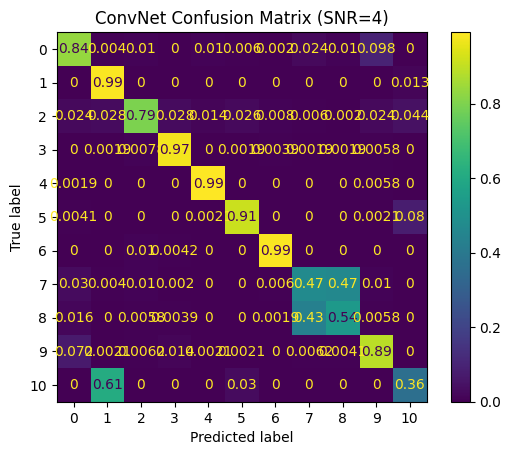

SNR: 4 - Accuracy: 80%   no. of test Signals: 5448 
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

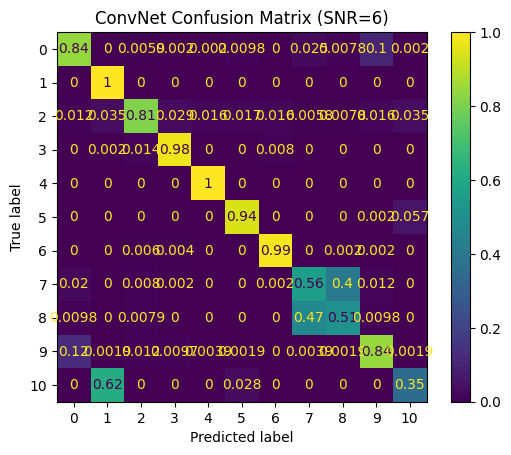

SNR: 6 - Accuracy: 80%   no. of test Signals: 5540 
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

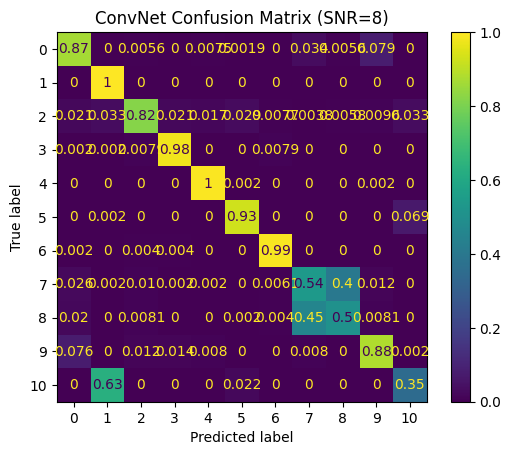

SNR: 8 - Accuracy: 81%   no. of test Signals: 5545 
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

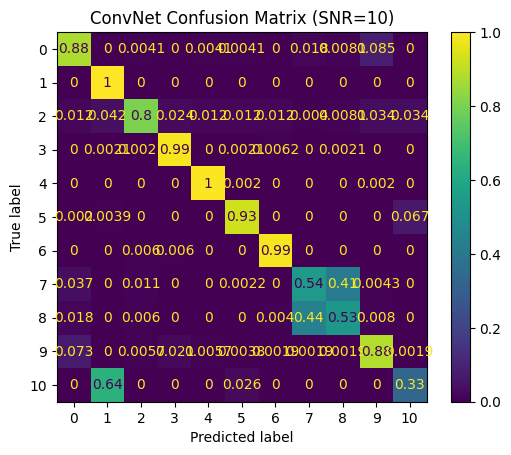

SNR: 10 - Accuracy: 81%   no. of test Signals: 5490 
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

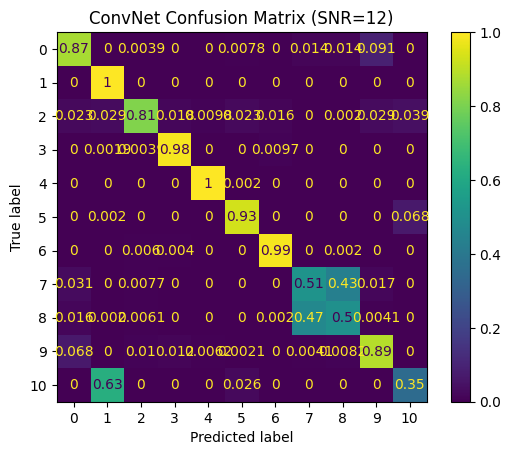

SNR: 12 - Accuracy: 80%   no. of test Signals: 5523 
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

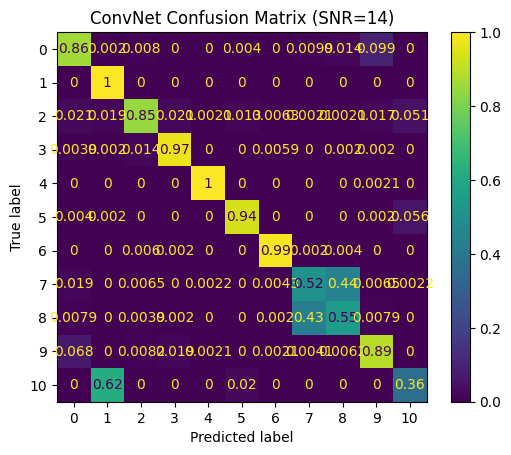

SNR: 14 - Accuracy: 81%   no. of test Signals: 5419 
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

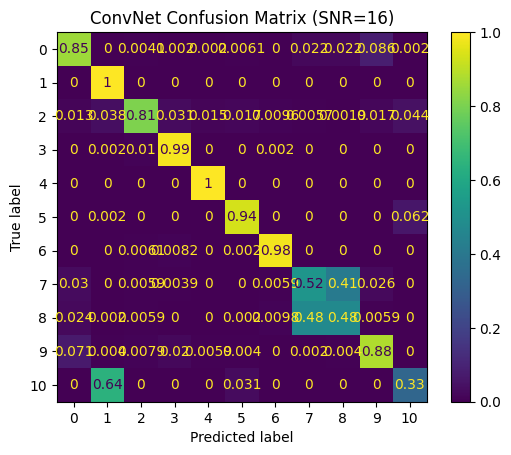

SNR: 16 - Accuracy: 79%   no. of test Signals: 5525 
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 640x480 with 0 Axes>

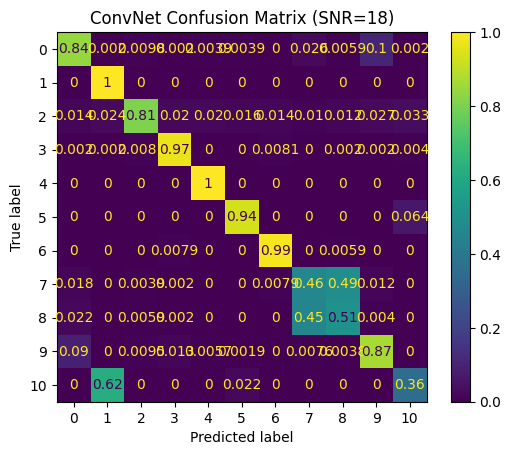

SNR: 18 - Accuracy: 80%   no. of test Signals: 5555 


In [ ]:
# Plot confusion matrix
acc = {}
classes = [0,1,2,3,4,5,6,7,8,9,10]
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]

    test_Y_i= np.array([np.argmax(x) for x in test_Y_i])
    #print(test_Y_i)

    # estimate classes
    # Remove the reshape operation as it is causing the shape mismatch
    # test_X_i = (test_X_i).reshape(test_X_i.shape[0] , 2,128,1)
    test_Y_i_hat = model.predict(test_X_i)  # Pass the original shape


    #print(test_Y_i_hat)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = test_Y_i[i]
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=confnorm, display_labels=classes)
    disp.plot() # Remove the title argument
    plt.title("ConvNet Confusion Matrix (SNR=%d)"%(snr)) # Set title using plt.title
    plt.show()

    #plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))

    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("SNR: {} - Accuracy: {:.0f}%   no. of test Signals: {} ".format(snr ,100* cor / (cor+ncor),test_X_i.shape[0]))
    acc[snr] = 1.0*cor/(cor+ncor)

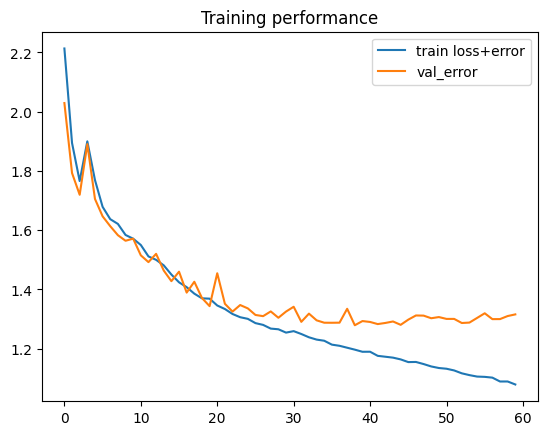

In [ ]:
# Plot training performance

import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()


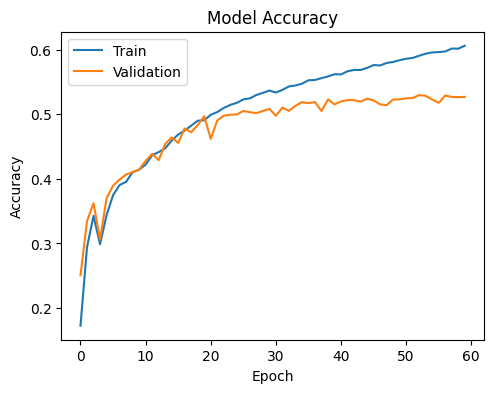

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN1.png')


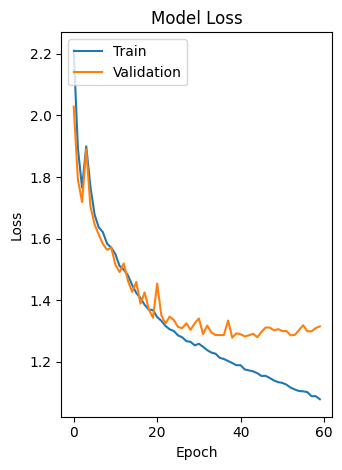

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN1.png')
plt.tight_layout()
plt.show()

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Evaluation Metrics Calculation
# Predict the probabilities and classes
yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = np.argmax(yhat_probs, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test_classes, yhat_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4694  145 2754  219  249  246   96  318  217  991  180]
 [  60 6408 1831  117   54  126   36   21   19   65 1122]
 [ 170  343 8065  223  141  206  118   61   53  220  369]
 [ 190  173 2664 5699  129  116  349   88   82  316  188]
 [ 242  166 2664  147 5761  234   95  113   93  292  161]
 [ 155  278 2573  131  147 5626   50   68   52  134  772]
 [ 194  132 1907  416  103  119 6538  138  104  213  128]
 [ 537  104 1804  190  150  136  133 3468 2954  438  115]
 [ 448   78 1120  147  123  121  119 3519 3849  379   89]
 [ 928  147 2655  286  250  186  105  203  169 4915  184]
 [  61 4476 1973   87   47  319   46   39   19   90 2917]]


In [ ]:
# Calculate and print additional metrics
accuracy = accuracy_score(Y_test_classes, yhat_classes)
precision = precision_score(Y_test_classes, yhat_classes, average='weighted')
recall = recall_score(Y_test_classes, yhat_classes, average='weighted')
f1 = f1_score(Y_test_classes, yhat_classes, average='weighted')
kappa = cohen_kappa_score(Y_test_classes, yhat_classes)
roc_auc = roc_auc_score(Y_test, yhat_probs, multi_class='ovr')

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.5267
Precision: 0.5970
Recall: 0.5267
F1 Score: 0.5391
Cohen's Kappa: 0.4795
ROC AUC: 0.8963


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
classification_report(Y_test_classes, yhat_classes) # Pass the predicted class labels instead of probabilities

'              precision    recall  f1-score   support\n\n           0       0.61      0.46      0.53     10109\n           1       0.51      0.65      0.57      9859\n           2       0.27      0.81      0.40      9969\n           3       0.74      0.57      0.65      9994\n           4       0.81      0.58      0.67      9968\n           5       0.76      0.56      0.65      9986\n           6       0.85      0.65      0.74      9992\n           7       0.43      0.35      0.38     10029\n           8       0.51      0.39      0.44      9992\n           9       0.61      0.49      0.54     10028\n          10       0.47      0.29      0.36     10074\n\n    accuracy                           0.53    110000\n   macro avg       0.60      0.53      0.54    110000\nweighted avg       0.60      0.53      0.54    110000\n'

In [ ]:
# Ensure both arrays are in the same format (multiclass)
yhat_probs1 = model.predict(X_train, verbose=0)
yhat_classes1 = np.argmax(yhat_probs1, axis=1)
Y_train_classes = np.argmax(Y_train, axis=1)  # Convert Y_train to multiclass

cm = confusion_matrix(Y_train_classes, yhat_classes1)
print(cm)

[[5758  146 2687  143  126   70   65  132  114  537  113]
 [  39 7299 1699   73   21   56   28   24    8   35  859]
 [  78  226 9101  103   43   76   43   24   24  104  209]
 [ 122  112 2576 6463   62   51  175   50   50  248   97]
 [ 144  158 2525   87 6514  143   65   45   59  155  137]
 [  42  193 2149   67   51 6924   29   14   12   49  484]
 [  90   73 1801  237   82   70 7295   52   61  143  104]
 [ 338   96 1603  128   83   89   84 6528  556  355  111]
 [ 297   66 1110  114   84   53   79  862 7012  277   54]
 [ 469   98 2683  175  117   54   74  104   81 5982  135]
 [  32 4099 1713   71   24  132   18   21    9   45 3762]]


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_train_classes, yhat_classes1) # Use Y_train_classes, which is in multiclass format
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_train_classes, yhat_classes1,  average='macro') # Use Y_train_classes here as well
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_train_classes, yhat_classes1, average='macro') # Use Y_train_classes here as well
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_train_classes, yhat_classes1,  average='macro') # Use Y_train_classes here as well
print('F1 score: %f' % f1)

Accuracy: 0.660345
Precision: 0.755477
Recall: 0.659908
F1 score: 0.681674


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
# Ensure both arrays are in the same format (multiclass)
Y_train_classes = np.argmax(Y_train, axis=1) # Convert Y_train to multiclass

classification_report(Y_train_classes,yhat_classes1) # Now both arrays are multiclass

'              precision    recall  f1-score   support\n\n           0       0.78      0.58      0.67      9891\n           1       0.58      0.72      0.64     10141\n           2       0.31      0.91      0.46     10031\n           3       0.84      0.65      0.73     10006\n           4       0.90      0.65      0.76     10032\n           5       0.90      0.69      0.78     10014\n           6       0.92      0.73      0.81     10008\n           7       0.83      0.65      0.73      9971\n           8       0.88      0.70      0.78     10008\n           9       0.75      0.60      0.67      9972\n          10       0.62      0.38      0.47      9926\n\n    accuracy                           0.66    110000\n   macro avg       0.76      0.66      0.68    110000\nweighted avg       0.76      0.66      0.68    110000\n'